# <font color='#1F618D'> 3. Setup the environment</font> 

## 3-1. Import numpy
Numpy arrays use much less overhead than python [iterables](https://docs.python.org/3/glossary.html#term-iterable); hence, they are prefable whenever the [tensor](https://en.wikipedia.org/wiki/Tensor) we'd like to process is large.

***In the first code cell we make the numpy package visible to the notebook environment and give it a short alias (np)***


In [0]:
import numpy as np

If you haven't seen any error messages, it means that you have run the first line of code sucessfully. 
***well done!***

## 3-2. Seed of random number generator
> ### 2-2-a. Code
set the seed of numpy random number generator to 0

In [0]:
np.random.seed(0)

> ### 2-2-b. Explain
What is the seed of random number generator? When is it required to be set?

In [0]:
'''
Seed of Random Number Generator:
It seeds the random number generator that is it produces the same set of 
random numbers drawn from a variety of probability distributions Random.
Seed are used to initialize the pseudo-random number generator.
Can be any integer between 0 and 2**32 - 1 inclusive, an array (or other sequence)
of such integers, or None (the default). [1]

Seeding is needed while reproducing the same set of data each time.
Sometimes it is necessary to replicate the scenarios producing the fixed set of
values to generate the same output or debug the existing logic by tracing
the pattern for fixed set of numbers.
For Example: 
train_test_split(train_data, random_state=10, shuffle=True, stratify =train_data[['target']], train_size=0.80)
here random_state=10 so here we have seeded the random numbers to 10 so every 
time the data split would have fixed ids in train and valid. By default, it
takes np.random so in this case it would split different set of train and valid 
while executing it again and again.


References:
[1]https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.RandomState.html#numpy.random.RandomState

'''


"\nSeed of Random Number Generator:\nIt seeds the random number generator that is it produces the same set of \nrandom numbers drawn from a variety of probability distributions Random.\nSeed are used to initialize the pseudo-random number generator.\nCan be any integer between 0 and 2**32 - 1 inclusive, an array (or other sequence)\nof such integers, or None (the default). [1]\n\nSeeding is needed while reproducing the same set of data each time.\nSometimes it is necessary to replicate the scenarios producing the fixed set of\nvalues to generate the same output or debug the existing logic by tracing\nthe pattern for fixed set of numbers.\nFor Example: \ntrain_test_split(train_data, random_state=10, shuffle=True, stratify =train_data[['target']], train_size=0.80)\nhere random_state=10 so here we have seeded the random numbers to 10 so every \ntime the data split would have fixed ids in train and valid. By default, it\ntakes np.random so in this case it would split different set of train

## 3-3. Import pandas
Pandas is a package that makes it easy and fast to query and manipulate  tabular data.

***Please make pandas package visible to the notebook environment and give it the alias "pd"***

In [0]:
import pandas as pd

---------------------------------------------------
#<font color='#1F618D'>  4. Prepare data</font> 
## 4-1. Download training dataset
The code below, downloads the training dataset into the notebook temporary storage and stores it in 'train.csv'.


In [0]:
import requests
train_url = 'http://web.cs.dal.ca/~farshid/train.csv'
r = requests.get(train_url)
with open('train.csv', 'wb') as f:
    f.write(r.content)

This dataset contains a number of extracted features from the movement of vessels in the occean recorded by AIS system. Each row represents a single trip and the columns are listed in table below.


<table boarder=10>
  <tr>
    <td>id</td>
    <td>bearing_rate_min </td>
     <td>bearing_rate_mean </td>
     <td> speed_p90 </td>
     <td> brate_rate_min </td>
   </tr><tr>
     <td>acceleration_mean </td>
     <td>bearing_rate_max </td>
     <td>speed_p75 </td>
     <td>bearing_rate_std </td>
     <td>brate_rate_mean </td>
     <td>target </td>
   </tr>
 </table>
 
 
_target shows the type of vessel_ corresponding to this trip (class).



## 4-2. Read the data

Using pandas read the csv file you've just downloaded into a DataFrame named train_data. Consider these:

* the delimiter used in the file is ','
* use the column "id" as index_col to prevent dublicating the index


In [0]:
#reading csv data and setting index_col to id
train_data = pd.read_csv('train.csv',sep=',',index_col=0)

## 4-3. Count the number of examples in each class
Using [groupby method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) print the total number of trips done by each class of vessel.

In [0]:
#total number of trips by each vessel/target
print(train_data.groupby(['target'])['target'].count())

target
0     617
1      39
2      65
3    6702
4      52
Name: target, dtype: int64


## 4-4. Print 10 randomly selected rows
Using numpy random generator print out 10 randomly selected rows of train_data

In [0]:
#printing 10 random rows from dataframe
#Reference: https://stackoverflow.com/questions/41690905/python-get-random-ten-values-from-a-pandas-dataframe
#selecting the rows based on the randomly generated Id's using np.random.choice
print(train_data.iloc[np.random.choice(np.arange(len(train_data)), 10, False)])

#alternatively use sample method over dataframe
#print(train_data.sample(10))

      bearing_rate_min  bearing_rate_mean  speed_p90  brate_rate_min  \
id                                                                     
6449         -5.993371          -0.000344   7.236826       -0.177299   
6410         -6.100898          -0.002204   6.832676       -0.148142   
39           -5.991638           0.000421  12.050299       -0.101366   
5300         -5.948078          -0.001198  12.609855       -0.108827   
6735         -6.099209          -0.001621  10.064428       -0.203397   
2200         -5.885467          -0.003357   7.130291       -0.155221   
1029         -6.097879           0.004053   5.707509       -0.169630   
2841         -6.094276          -0.002975  11.205695       -0.186765   
2006         -4.784211          -0.003681   8.844306       -0.102388   
6454         -2.937808           0.004661  11.575301       -0.053227   

      acceleration_mean  bearing_rate_max  speed_p75  bearing_rate_std  \
id                                                           

## 4-5. Split train and validation

> ### 4-5-a. Code
Using scikit-learn split train_data into two DataFrames named train and valid. Consider these setup:
* random_state should be set to 10
* enable shuffling
* stratify based on 'target'
* store 80% of the examples in _train_ and the rest in _valid_

In [0]:
from sklearn.model_selection import train_test_split

#spliting training set into train and valid in 80% and 20% respectively with random_State 10, suffle true and stratify based on target
#Reference: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
train, valid = train_test_split(train_data, random_state=10, shuffle=True, stratify =train_data[['target']], train_size=0.80)

> ### 4-5-2. Explain
What's the roll of stratify?

In [0]:
'''
Stratify divides the training data into train and valid in proportion mentioned 
in test_size/train_size taking the mentioned column(in this case Target) into
consideration.
For Example: In above senario. If we have 60 training data which to be divided
into 80% train and 20% valid and we want to stratify it based on target.
Given that, we have target=3 for 50 rows and target=0 for 10 rows then it would
make sure we have 2 rows with target=0 in valid(20%) and rest in train. If 
stratify was not provided then it might not contain any target=0 and just 
target=3 in valid.
'''

'\nStratify divides the training data into train and valid in proportion mentioned \nin test_size/train_size taking the mentioned column(in this case Target) into\nconsideration.\nFor Example: In above senario. If we have 60 training data which to be divided\ninto 80% tain and 20% valid and we want to stratify if based on target.\nSo we have target=3 for 50 rows and target=0 for 10 rows then it would make\nsure we have 2 rows with target=0 in valid(20%) and rest in train.\n'

---------------------------------------
#<font color='#1F618D'>   5. Clustering</font>
Using first two features (bearing_rate_min and 	bearing_rate_mean), cluster the data in the following order (use scikit-learn).

## 5-1. k-means
* consider k=2,3,4
* visualize clustered points (also show true labels if you can)
* to visulalize you can get help from [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py) and 
[here](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_masked.html#sphx-glr-gallery-lines-bars-and-markers-scatter-masked-py)
* in the first cell prepare the environment

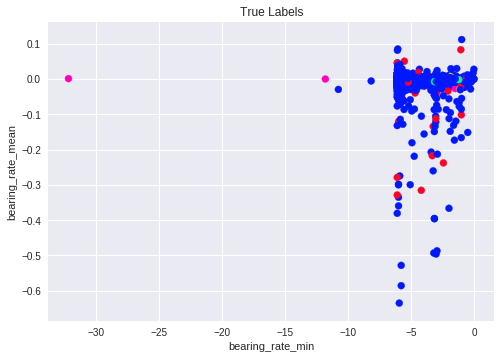

In [0]:
k = [2,3,4]

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#To plot the dataset for clusters assigned by KMeans
def plotKmeans(num_clust):
    #Applying KMeans and fitting the model based on features='bearing_rate_min','bearing_rate_mean'
    k_means= KMeans(n_clusters=num_clust,random_state=10)
    k_means.fit(train_data[['bearing_rate_min','bearing_rate_mean']])
    centers = k_means.cluster_centers_
    labels = k_means.labels_
    plt.subplot(111)
    #Plotting data points with different colors for each cluster.
    plt.scatter(train_data['bearing_rate_min'],train_data['bearing_rate_mean'], c=labels,cmap='gist_rainbow')
    #Plotting the clusters with black
    plt.scatter(centers[:, 0], centers[:, 1], color='black')
    plt.title("k-means clustering"+" (clusters: "+str(num_clust)+")")
    plt.xlabel('bearing_rate_min')
    plt.ylabel('bearing_rate_mean')
    plt.show()

#Plotting the dataset belonging to a true label/Target based on mentioned 2 features
def plottingTarget():
    plt.subplot(111)
    plt.scatter(train_data['bearing_rate_min'],train_data['bearing_rate_mean'], c=train_data['target'],cmap='gist_rainbow')
    plt.title("True Labels")
    plt.xlabel('bearing_rate_min')
    plt.ylabel('bearing_rate_mean')
    plt.show()
    
plottingTarget() 

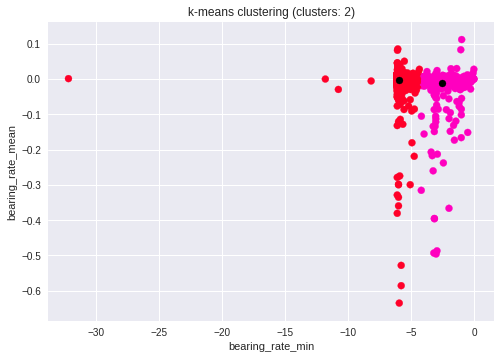

In [0]:
plotKmeans(k[0])

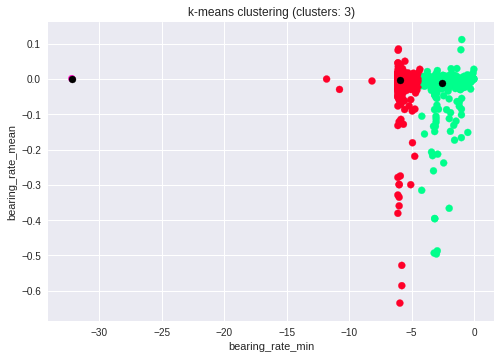

In [0]:
plotKmeans(k[1])

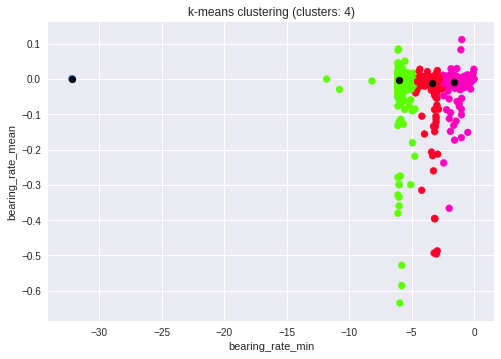

In [0]:
plotKmeans(k[2])

## 5-2. DBSCAN
* use eps=0.1 and min_samples=30


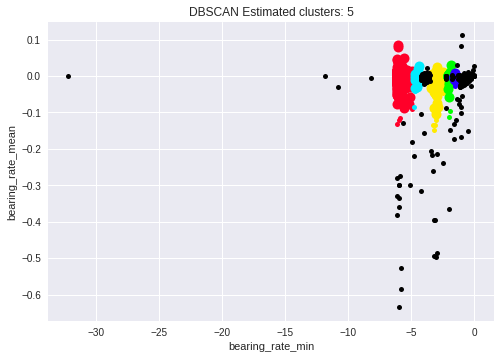

In [0]:
from sklearn.cluster import DBSCAN

# Compute DBSCAN
db = DBSCAN(eps=0.1, min_samples=30).fit(train_data[['bearing_rate_min','bearing_rate_mean']])
labels = db.labels_


#Start Plot result
#Reference: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
#core_samples_mask will be the boolean array list where labels -1 (outliers) are set to false and rest true
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.gist_rainbow(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    #sets true for the current value of k and false for the rest of the labels
    class_member_mask = (labels == k)

    xy = train_data[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = train_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

plt.title('DBSCAN Estimated clusters: %d' % n_clusters_)
plt.xlabel('bearing_rate_min')
plt.ylabel('bearing_rate_mean')
plt.get_figlabels()
plt.show()

#End Plot Result

------------------------------
#<font color='#1F618D'>   6. Classification</font>
## 6-1. Train and validate
Train below classifiers using their default hyperparameters in scikit-learn (use random_state=10 wherever applicable) on the training set and evaluate the results using the validation set.
1. Logistic Regression
2. Naive Bayes
3. Decision Tree
4. Random Forest



Report the confusion matrix and accuracy score for _train_ and _valid_.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#classifiers
names = ["Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes"]
classifiers = [
    LogisticRegression(random_state=10),
    DecisionTreeClassifier(random_state=10),
    RandomForestClassifier(random_state=10),
    GaussianNB()]

#Features
features = ['bearing_rate_min','bearing_rate_mean','speed_p90','brate_rate_min','acceleration_mean','bearing_rate_max','speed_p75','bearing_rate_std','brate_rate_mean']

#iterate over classifiers
#Reference: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
for name, clf in zip(names, classifiers):
    #training the respective cassifer model with the training set
    clf.fit(train[features],train['target'])
    print("Classifier: " + name)
    #Printing confusion matrix
    #Reference: https://stackoverflow.com/questions/50325786/sci-kit-learn-how-to-print-labels-for-confusion-matrix
    unique_label = np.unique(valid['target'])
    cnf_matrix = confusion_matrix(valid['target'],clf.predict(valid[features]),labels=unique_label)
    print(pd.DataFrame(cnf_matrix, index=['true:{:}'.format(x) for x in unique_label],
                   columns=['pred:{:}'.format(x) for x in unique_label]))
    #End of Printing Confusion Matrix
    #Accuracy Score of Classifer
    #clf.score internally calls accuracy_score method though when accuracy_score is implemented there is slight variation in output
    score = clf.score(valid[features], valid['target'])
    print("Score "+str(round(score,4))+"\n")

Classifier: Logistic Regression
        pred:0  pred:1  pred:2  pred:3  pred:4
true:0       3       0       0     120       0
true:1       0       0       0       8       0
true:2       0       0       0      13       0
true:3       6       0       0    1334       0
true:4       2       0       0       7       2
Score 0.8957

Classifier: Decision Tree
        pred:0  pred:1  pred:2  pred:3  pred:4
true:0      35       1       2      83       2
true:1       0       0       1       7       0
true:2       2       0       1      10       0
true:3      99      10      14    1216       1
true:4       1       0       0       5       5
Score 0.8408

Classifier: Random Forest
        pred:0  pred:1  pred:2  pred:3  pred:4
true:0      23       0       1      99       0
true:1       0       0       0       8       0
true:2       1       0       0      11       1
true:3      40       0       0    1300       0
true:4       2       0       0       5       4
Score 0.8876

Classifier: Naive Bayes
    

## 6-2. Learning-curves
> ### 6-2-a. Code
Plot [learning-curve](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html) for all classifiers mentioned in 6.1. Consider following setup:
 * use 10-fold cross-validation on the whole training data (train_data)
 * random_state=10 wherever applicable


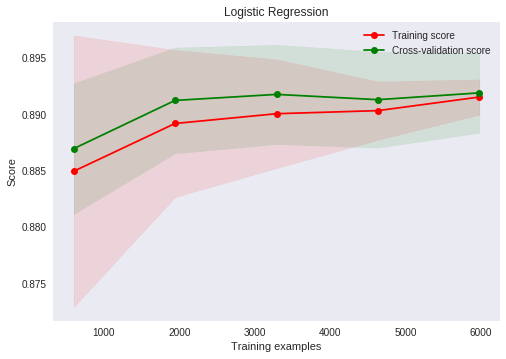

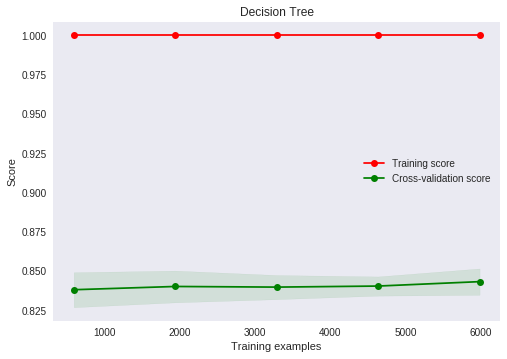

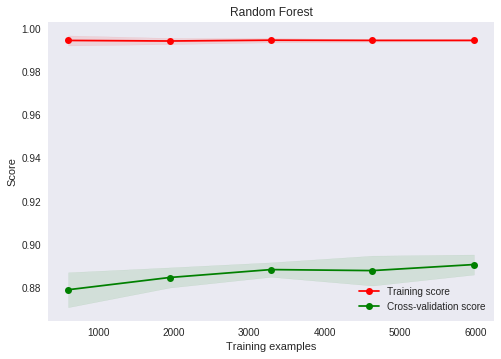

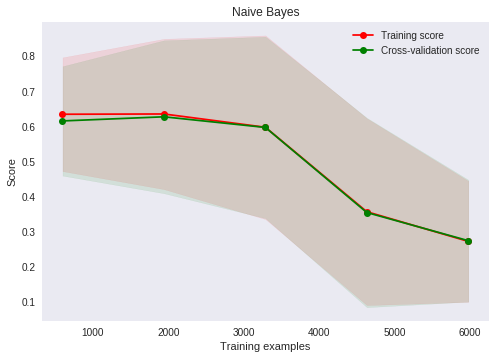

In [0]:
#Plot Learning Curves
#Reference: http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
#End of function


#spliting data 10 times for cross validation of the classifer
cross_val = ShuffleSplit(n_splits=10, test_size=0.2, random_state=10)

#invoking learning curve method for each classifier
for name, clf in zip(names, classifiers):
    plot_learning_curve(clf, name, train_data[features], train_data['target'], cv=cross_val)



> ### 6-2-a. Explain
* what does a learning-curve show?
* justify the mean and variance of the learning-curves of different classifiers.

In [0]:
'''
Learning Curve: It plots the training score and cross-validation score of an
estimator as the number of training examples increases.
Number of training examples (x-axis) vs accuracy score(Y-axis).
Learning Curve helps to evaluate an estimator by understanding the bias and 
variance. Also, it helps to estimate that whether adding more training data to the
estimator would help in the performance of the estimator.

Learning Curves for Different Classifiers:
Logistic Regression:
In logistic regression training score is around 0.885 and cross validation score
is 0.886. As the training example increases the training and cross validation
score converges around 0.89.
This implies that the model fits the training examples well and cross validation
score is also better as the model is able to generalize over the data set.
So, the model overall has a low bias and low variance. 

Decision Tree:
In Decision Tree the training score is constantly 1 and 
cross validation score has a slight slope around 0.835 accuracy score as the
training examples increases.
This implies that the model has low bias and high variance(overfitting) as it
performs extremely well with the training data set but relatively poor accuracy
score in case of cross validation. 

Random Forest:
In Random Forest the training score is constantly around 0.99 and
cross validation score has a slight slope around 0.88 accuracy score.
This implies that the model has low bias and high variance(overfitting) as it 
performs extremely well with the training data set but relatively poor accuracy
score in case of cross validation. 

Naive Bayes:
In Naive Bayes Learning curve, it is seen that with initial number of training set
the score is around 0.65 for cross validation and training score. Increasing the
training examples decreases the accuracy score further.Also, training and 
cross validation curves converge.
This implies that there is high bias (underfitting) as there are more incorrect
classification done by the estimator and low variance as the cross-validation
score is around same as the training score. So, the model generalizes the same
way for the cross validation dataset. 

'''


'\nLearning Curve: It plots the training score and cross-validation score of an\nestimator as the number of training examples increases.\nNumber of training examples (x-axis) vs accuracy score(Y-axis).\nLearning Curve helps to evaluate an estimator by understanding the bias and \nvariance. Also, it helps to estimate that whether adding more training data to the\nestimator would help in the performance of the estimator.\n\nLearning Curves for Different Classifiers:\nLogistic Regression:\nIn logistic regression training score is around 0.885 and cross validation score\nis 0.886. As the training example increases the training and cross validation\nscore converges around 0.89.\nThis implies that the model fits the training examples well and cross validation\nscore is also better as the model is able to generalize over the data set.\nSo, the model overall has a low bias and low variance. \n\nDecision Tree:\nIn Decision Tree the training score is constantly 1 and \ncross validation score has

## 6-3. Constant Classifier
Use const_classifier defined bellow (run it first).


In [0]:
def const_classifier(input):
  return 3* np.ones(input.shape[0], dtype=int)

> ### 6-3-a. Code
Plot learning-curves using const_classifier like what you did in 6.2.


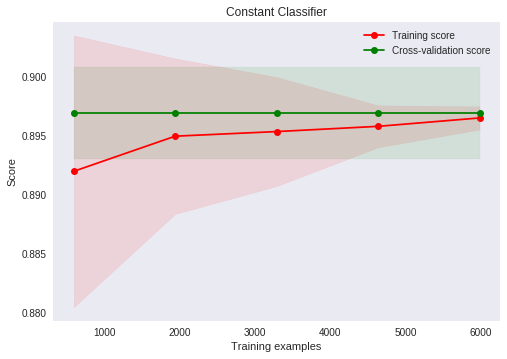

In [0]:
#6-3-a Code

from sklearn.dummy import DummyClassifier

#Used Dummy Classifier to create a constant classifier that will always predict the constant label (3 in this case) provided by the user.
constant_clf = DummyClassifier(strategy='constant', random_state=10, constant=3)
clf.fit(train[features],train['target'])
plot_learning_curve(constant_clf,"Constant Classifier", train_data[features], train_data['target'], cv=cross_val)
plt.show()

> ### 6-3-b. Explain
* Discuss why accuracy score isn't a suitable measure in this dataset. 
* What alternatives do exist to evaluate a classifier?

In [0]:
#6-3-b Explain
'''
Accuracy Score isn't a suitable measure for the given dataset because the number
of training set available for each label is not uniform. 
There are lot of training examples for 'Target 3' but for other targets 
they are significantly less.
As we can see that creating a constant classifier that pedicts label as 3 
constantly for every dataset it is able to score around 90% accuracy.

Target Count
0       617
1        39
2        65
3      6702
4        52

About F1_Score:
The F1 score can be interpreted as a weighted average of the precision and recall.
F1 = 2 * (precision * recall) / (precision + recall).
In the multi-label case, this is the average of the F1 score of
each class with weighting depending on the average parameter. [1]

So, weighted F1 score(metrics.f1_score: weighted average) would be a better
choice to calculate evaluate the model.

As it would calculate metrics for each label(target), and find their average
weighted by support(the number of true instances for each label).[1]


Different Classification model Scoring methods:
‘accuracy’,
‘balanced_accuracy’,
‘average_precision’,
‘brier_score_loss’,
‘f1’,
‘f1_micro’,
‘f1_macro’,
‘f1_weighted’,
‘f1_samples’,
‘neg_log_loss’,
‘precision’ etc.,
‘recall’ etc. and
‘roc_auc’.  [2]


References:
[1] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
[2] http://scikit-learn.org/stable/modules/model_evaluation.html
'''

"\nAccuracy Score isn't a suitable measure for the given dataset because the number\nof training set available for each label is not uniform. \nThere are lot of training examples for 'Target 3' but for other targets \nthey are significantly less.\nAs we can see that creating a constant classifier that pedicts label as 3 \nconstantly for every dataset it is able to score around 90% accuracy.\n\nTarget Count\n0       617\n1        39\n2        65\n3      6702\n4        52\n\nAbout F1_Score:\nThe F1 score can be interpreted as a weighted average of the precision and recall.\nF1 = 2 * (precision * recall) / (precision + recall).\nIn the multi-label case, this is the average of the F1 score of\neach class with weighting depending on the average parameter. [1]\n\nSo, weighted F1 score(metrics.f1_score: weighted average) would be a better\nchoice to calculate evaluate the model.\n\nAs it would calculate metrics for each label(target), and find their average\nweighted by support(the number of 

## 6-4. Confidence
> ### 6-4-a. 10-fold cross-validation
Perform 10-fold cross-validation ***on the whole training data (train_data)*** and report the score you suggested in 6-3-b for all classifiers listed in 6-1 and the one introduced in 6-3.
* splits should be such that train has 80% of the examples (stratified)

In [0]:
from sklearn.model_selection import cross_val_score

#constant classifier
def const_classifier(input):
  return 3* np.ones(input.shape[0], dtype=int)

#classifiers
names = ["Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes"]
classifiers = [
    LogisticRegression(random_state=10),
    DecisionTreeClassifier(random_state=10),
    RandomForestClassifier(random_state=10),
    GaussianNB(),
    DummyClassifier(strategy='most_frequent', random_state=10, constant=const_classifier(train_data))]

#Features
features = ['bearing_rate_min','bearing_rate_mean','speed_p90','brate_rate_min','acceleration_mean','bearing_rate_max','speed_p75','bearing_rate_std','brate_rate_mean']


#to calculate 10 cross validation score using f1_weighted scoring and take mean of the scores
#Reference: http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
logistic_scores = cross_val_score(LogisticRegression(random_state=10), train_data[features],train_data['target'], cv=10, scoring='f1_weighted')
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (logistic_scores.mean(), logistic_scores.std() * 2))

decisiontree_scores = cross_val_score(DecisionTreeClassifier(random_state=10), train_data[features],train_data['target'], cv=10, scoring='f1_weighted')
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (decisiontree_scores.mean(), decisiontree_scores.std() * 2))

randomforest_scores = cross_val_score(RandomForestClassifier(random_state=10), train_data[features],train_data['target'], cv=10, scoring='f1_weighted')
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (randomforest_scores.mean(), randomforest_scores.std() * 2))

gaussian_scores = cross_val_score(GaussianNB(), train_data[features],train_data['target'],cv=10, scoring='f1_weighted')
print("Naive Bayes Accuracy: %0.2f (+/- %0.2f)" % (gaussian_scores.mean(), gaussian_scores.std() * 2))

constantclf_scores = cross_val_score(DummyClassifier(strategy='constant',random_state=10, constant=3), train_data[features],train_data['target'], cv=10, scoring='f1_weighted')
print("Constant Classifier Accuracy: %0.2f (+/- %0.2f)" % (constantclf_scores.mean(), constantclf_scores.std() * 2))


Logistic Regression Accuracy: 0.85 (+/- 0.01)
Decision Tree Accuracy: 0.85 (+/- 0.01)
Random Forest Accuracy: 0.87 (+/- 0.02)
Naive Bayes Accuracy: 0.36 (+/- 0.31)
Constant Classifier Accuracy: 0.85 (+/- 0.00)


>### 6-4-b. T-test
Show if other classifiers are significantly different from Random Forest classifier in terms of the scores you have calculated in 6-4-a.
* Use  $\alpha=0.05$ as the significance threshold
* you can find a good explaination of t-test [here](https://www.youtube.com/watch?v=pTmLQvMM-1M)


In [0]:
from scipy.stats import ttest_ind

#ttest for randomforest and logistic regression 
print("T-test for Random Forest and Logistic Regression: ")
print(ttest_ind(randomforest_scores,logistic_scores))
#ttest for randomforest and decision tree
print("T-test for Random Forest and Decision Tree: ")
print(ttest_ind(randomforest_scores,decisiontree_scores))
#ttest for randomforest and Naive Bayes 
print("T-test for Random Forest and Naive Bayes: ")
print(ttest_ind(randomforest_scores,gaussian_scores))
#ttest for randomforest and Constant Classifier
print("T-test for Random Forest and Constant Classifier: ")
print(ttest_ind(randomforest_scores,constantclf_scores))

T-test for Random Forest and Logistic Regression: 
Ttest_indResult(statistic=4.161205878209398, pvalue=0.0005866755545455729)
T-test for Random Forest and Decision Tree: 
Ttest_indResult(statistic=2.9852170221763594, pvalue=0.007936367780425497)
T-test for Random Forest and Naive Bayes: 
Ttest_indResult(statistic=9.67828368693792, pvalue=1.4737007364155254e-08)
T-test for Random Forest and Constant Classifier: 
Ttest_indResult(statistic=5.137959028021888, pvalue=6.894190379100783e-05)


> ### 6-4-c. Explain
Further explain about your answers in 6-4-b? What do they show?

In [0]:
#6-4-c. Explain
'''
T-Test
H0 (Null Hypothesis): Classifier B is not significantly different from Random Forest classifier in terms of the scores.
H1 (Alternate Hypothesis): Classifier B is significantly different from Random Forest classifier in terms of the scores
α=0.05 as the significance threshold

Note: If we observe a large p-value, for example larger than 0.05(significance 
threshold), then we cannot reject the null hypothesis of identical average scores.
If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject
the null hypothesis of equal averages. [1]

Case 1: Random Forest and Logistic Regression:
Here p value is 0.00058667 which is less than 0.05 so we reject the null hypothesis and conclude that 2 models are significantly different.

Case 2: Random Forest and Decision Tree:
Here p value is 0.0079363 which is less than 0.05 so we reject the null hypothesis and conclude that 2 models are significantly different.

Case 3: Random Forest and Naive Baye's:
Here p value is 0.000000014737 which is less than 0.05 so we reject the null hypothesis and conclude that 2 models are significantly different.

Case 4: Random Forest and Constant Classifier:
Here p value is 0.0000689419 which is less than 0.05 so we reject the null hypothesis and conclude that 2 models are significantly different.

Hence Random Forest Classifier is significantly different from other above mentioned classifier.

References:
[1] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
'''

"\nT-Test\nH0 (Null Hypothesis): Classifier B is not significantly different from Random Forest classifier in terms of the scores.\nH1 (Alternate Hypothesis): Classifier B is significantly different from Random Forest classifier in terms of the scores\n\xce\xb1=0.05 as the significance threshold\n\nNote: If we observe a large p-value, for example larger than 0.05(significance \nthreshold), then we cannot reject the null hypothesis of identical average scores.\nIf the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject\nthe null hypothesis of equal averages. [1]\n\nCase 1: Random Forest and Logistic Regression:\nHere p value is 0.00058667 which is less than 0.05 so we reject the null hypothesis and conclude that 2 models are significantly different.\n\nCase 2: Random Forest and Decision Tree:\nHere p value is 0.0079363 which is less than 0.05 so we reject the null hypothesis and conclude that 2 models are significantly different.\n\nCase 3: Random Forest and Naive 

------------------------------
#<font color='#1F618D'>  7. Test</font>

## 7-1 Retrieve test data
Complete the cell below to access the test dataset

In [0]:
import requests
train_url = 'http://web.cs.dal.ca/~farshid/test.csv'
r = requests.get(train_url)
with open('test.csv', 'wb') as f:
    f.write(r.content)
    
# reading test_data from test.csv created locally
test_data = pd.read_csv('test.csv',sep=',',index_col=0)


## 7-2 Report best score
> ### 7-2-a Code
Select the best classifier from the ones that you have tried. Tune its hyperparameters if applicable and report its final accuracy score using test_data.

In [0]:
#classifiers
names = ["Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes"]
rfclassifier = RandomForestClassifier(n_estimators=100,random_state=10,min_samples_leaf=3)
train, valid = train_test_split(train_data, random_state=10, shuffle=True, stratify =train_data[['target']], train_size=0.80)
rfclassifier.fit(train[features],train['target'])
prediction = rfclassifier.predict(test_data[features])
score= rfclassifier.score(test_data[features], test_data['target'])
print(score)


0.9068181818181819


>### 7-2-b. Explain
Please briefly explain how you selected the classifier, how you tuned it (if applicable) and how you selected the best.

In [0]:
'''
Random Forest seems to be the appropriate classifier for the data because:
The cross validation score is better than other classifier and also t-test 
indicates that it is significantly different from other classifier.

Tuning Hyperparameters:
1) n_estimator = 100
   It indicates the number of trees in the forest.

2) min_samples_leaf =3
   It is the value of the minimum number of samples required to be at a leaf node.
   It helps to smooth the performance of the classifier. [1]

Created a Test code to figure out the best parameters that could improve
the performance of the classifier but there was not much significant difference
in the accuracy score.


Note: The GridSearchCV instance implements the usual estimator API: when 
“fitting” it on a dataset all the possible combinations of parameter values are
evaluated and the best combination is retained.[2]

References:
[1] http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
[2] http://scikit-learn.org/stable/modules/grid_search.html

'''

'\nRandom Forest seems to be the appropriate classifier for the data because:\nThe cross validation score is better than other classifier and also t-test \nindicates that it is significantly different from other classifier.\n\nTuning Hyperparameters:\n1) n_estimator = 100\n   It indicates the number of trees in the forest.\n\n2) min_samples_leaf =3\n   It is the value of the minimum number of samples required to be at a leaf node.\n   It helps to smooth the performance of the classifier. [1]\n\nCreated a Test code to figure out the best parameters that could improve\nthe performance of the classifier but there was not much significant difference\nin the accuracy score.\n\n\nNote: The GridSearchCV instance implements the usual estimator API: when \n\xe2\x80\x9cfitting\xe2\x80\x9d it on a dataset all the possible combinations of parameter values are\nevaluated and the best combination is retained.[2]\n\nReferences:\n[1] http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.Ra